In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Including the Dataset

In [47]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the info of Dataset


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Dropping the NaN values

In [50]:
#The column 'Cabin' had too many null values so it was better to drop the column 
#The column 'Name', 'PassengerId' and 'Ticket' hd no influence in deciding the survival rate hence dropping the columns

df.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [51]:
#The column 'Age' with unknown was better to drop instead of using mean or any other sort of values   
df.dropna(inplace = True)

In [52]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Preprocessing the data

In [53]:
# Lets retrieve the unique values in 'Embarked' column 

df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### using one hot coding technique

In [54]:
#using one hot encoding technique to encode string/character values into integers

df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked').astype(int)], axis=1)
df.drop('Embarked',axis=1,inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,0,1,0
886,0,2,male,27.0,0,0,13.0000,0,0,1
887,1,1,female,19.0,0,0,30.0000,0,0,1
889,1,1,male,26.0,0,0,30.0000,1,0,0


In [55]:
df = pd.concat([df,pd.get_dummies(df['Sex']).astype(int)],axis = 1)
df.drop('Sex',axis = 1, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


# Identifying the Outliers

In [67]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,female,male
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.394813,2.272334,29.602550,0.505764,0.413545,28.061983,0.171470,0.040346,0.788184,0.355908,0.644092
std,0.489163,0.823123,14.537539,0.922289,0.839426,30.353275,0.377191,0.196911,0.408890,0.479133,0.479133
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,31.206250,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000


### graphically identifying the outliers

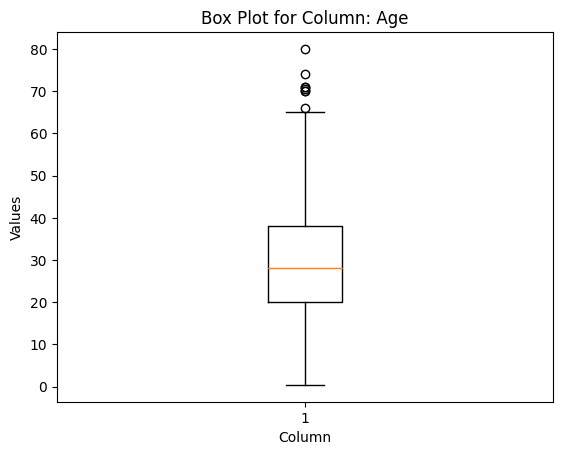

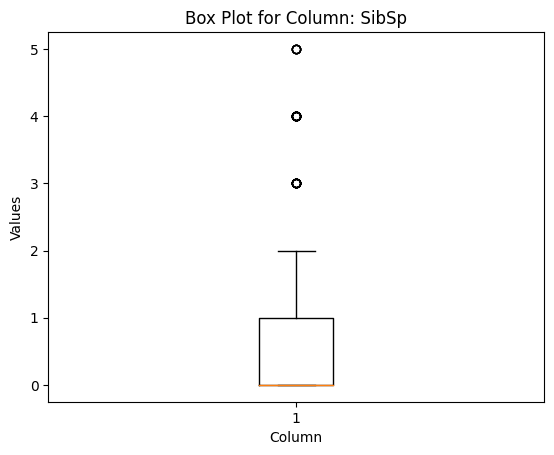

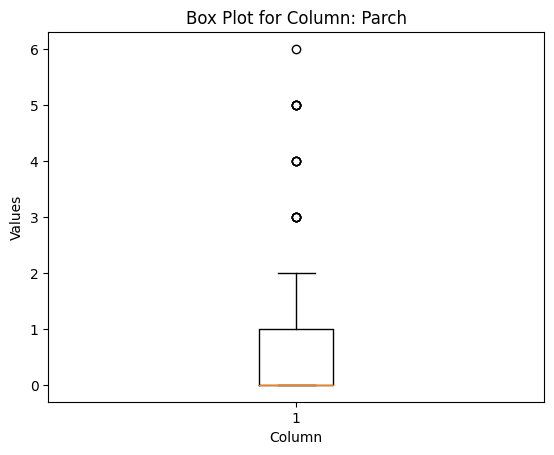

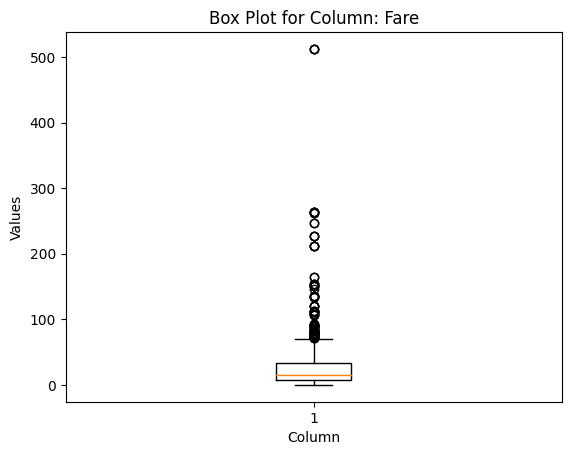

In [58]:
# Select the columns using iloc
cols = df.iloc[:, 2:6]

# Create individual box plots for each selected column
for column in cols:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(cols[column])
    plt.title(f'Box Plot for Column: {column}')
    plt.ylabel('Values')
    plt.xlabel('Column')
    plt.show()


In [59]:
len(df[df['Fare']>200])

18

<Axes: >

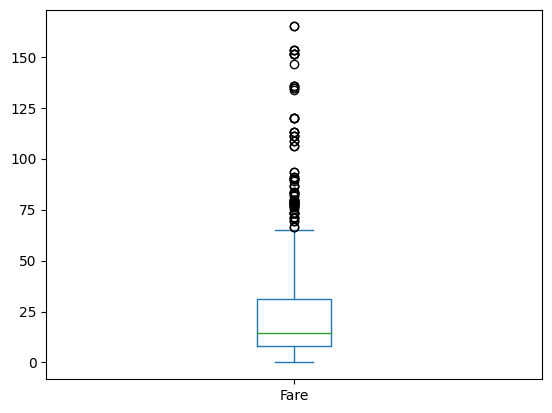

In [69]:
#since the dataset comparetively wont affect much if droping the outliers instead of fixing it, lets remove that and recheck

df = df[df['Fare']<200].reset_index(drop = True)
df['Fare'].plot(kind = 'box')

In [70]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,female,male
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.394813,2.272334,29.602550,0.505764,0.413545,28.061983,0.171470,0.040346,0.788184,0.355908,0.644092
std,0.489163,0.823123,14.537539,0.922289,0.839426,30.353275,0.377191,0.196911,0.408890,0.479133,0.479133
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,31.206250,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000


# Model

In [72]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [73]:
from sklearn.model_selection import train_test_split as ttsplit
x_train, x_test, y_train, y_test = ttsplit(x,y,train_size = 0.8, test_size = 0.2, random_state = 43)

In [74]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [75]:
y_pred = model.predict(x_test)

# Generating the scores

In [76]:
from sklearn.metrics import classification_report
clsreport = classification_report(y_test, y_pred)
print(clsreport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.96      0.98        57

    accuracy                           0.99       139
   macro avg       0.99      0.98      0.99       139
weighted avg       0.99      0.99      0.99       139



# Visualisation

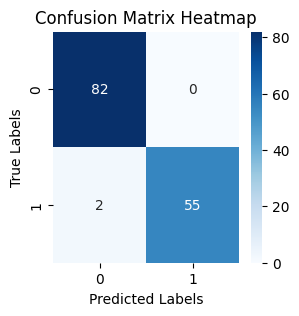

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

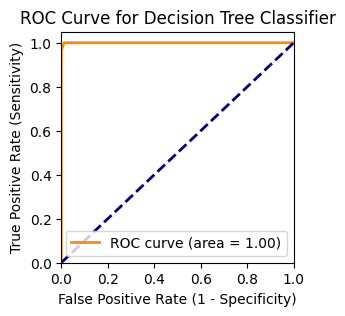

In [85]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()
